# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 559


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anaconda
Processing Record 2 of Set 1 | nuuk
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | taulaga
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | guia lopes da laguna
Processing Record 7 of Set 1 | la passe
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | lata
Processing Record 12 of Set 1 | laojunmiao
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | dudinka
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | novyy urgal
Processing Record 17 of Set 1 | iguape
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | minas de marcona
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | is

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anaconda,46.1285,-112.9423,38.39,94,81,6.98,US,1706405966
1,nuuk,64.1835,-51.7216,5.61,66,100,13.80,GL,1706405880
2,port-aux-francais,-49.3500,70.2167,46.17,90,95,29.53,TF,1706405966
3,taulaga,-11.0553,-171.0883,85.50,69,14,8.95,AS,1706405966
4,edinburgh of the seven seas,-37.0676,-12.3116,58.77,70,100,25.70,SH,1706405966


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anaconda,46.1285,-112.9423,38.39,94,81,6.98,US,1706405966
1,nuuk,64.1835,-51.7216,5.61,66,100,13.80,GL,1706405880
2,port-aux-francais,-49.3500,70.2167,46.17,90,95,29.53,TF,1706405966
3,taulaga,-11.0553,-171.0883,85.50,69,14,8.95,AS,1706405966
4,edinburgh of the seven seas,-37.0676,-12.3116,58.77,70,100,25.70,SH,1706405966


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

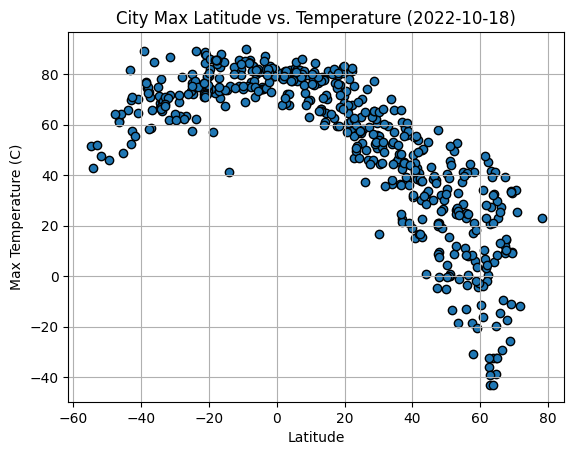

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

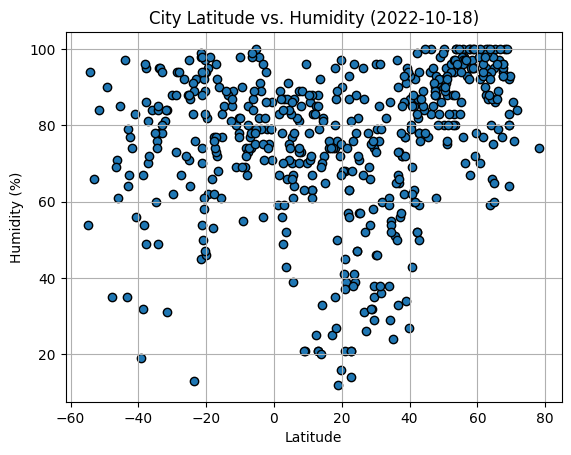

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

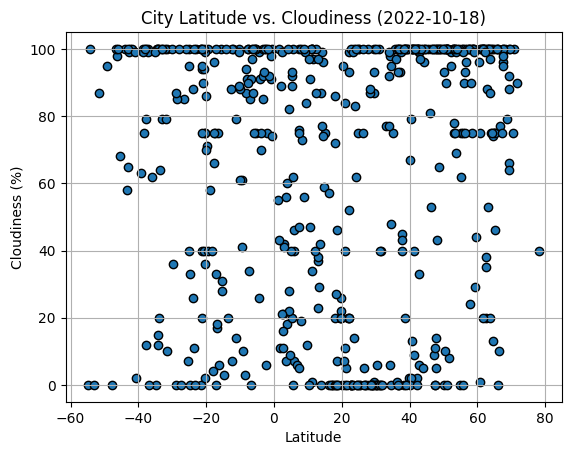

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

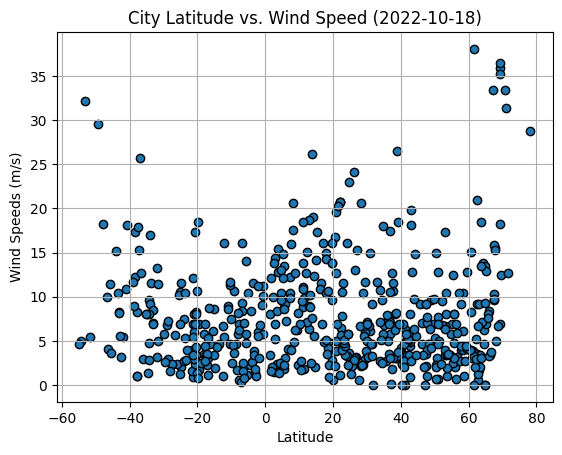

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speeds (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lr(x,y,title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate regression line values
    regression_x_values = np.linspace(min(x), max(x), 100)
    regression_y_values = slope * regression_x_values + intercept

    # Scatter plot
    plt.scatter(x, y, marker='o', edgecolors='black', linewidths=1, label='Cities')

    # Plot the linear regression line
    plt.plot(regression_x_values, regression_y_values, color='red', label='Linear Regression Line')


    plt.xlabel('Latitude')
    plt.ylabel(title)


    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(equation_text, (max(x), max(y)), fontsize=12, color='red', ha='right')

    print(f'The r-value is: {r_value**2:.15f}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anaconda,46.1285,-112.9423,38.39,94,81,6.98,US,1706405966
1,nuuk,64.1835,-51.7216,5.61,66,100,13.80,GL,1706405880
6,la passe,45.5549,-0.8967,43.03,77,100,9.15,FR,1706405966
8,whitehorse,60.7161,-135.0538,34.11,92,75,15.01,CA,1706405967
9,yellowknife,62.4560,-114.3525,0.41,88,20,9.22,CA,1706405967


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,46.17,90,95,29.53,TF,1706405966
3,taulaga,-11.0553,-171.0883,85.50,69,14,8.95,AS,1706405966
4,edinburgh of the seven seas,-37.0676,-12.3116,58.77,70,100,25.70,SH,1706405966
5,guia lopes da laguna,-21.4578,-56.1142,70.84,45,0,3.94,BR,1706405966
7,invercargill,-46.4000,168.3500,61.61,71,98,4.07,NZ,1706405966


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.716999272861834


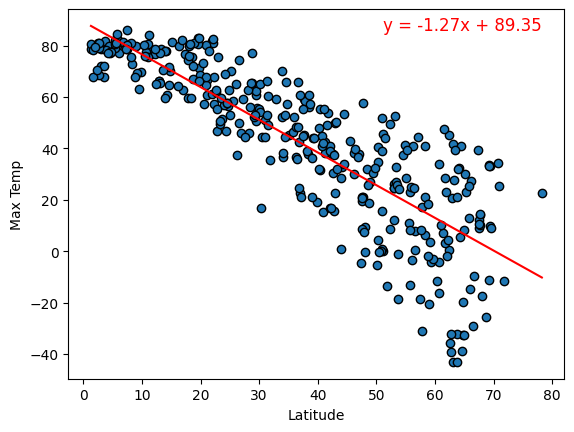

In [15]:
# Linear regression on Northern Hemisphere
northern_x_values = northern_hemi_df['Lat']
northern_y_values = northern_hemi_df['Max Temp']

lr(northern_x_values, northern_y_values, 'Max Temp')



The r-value is: 0.374302806650437


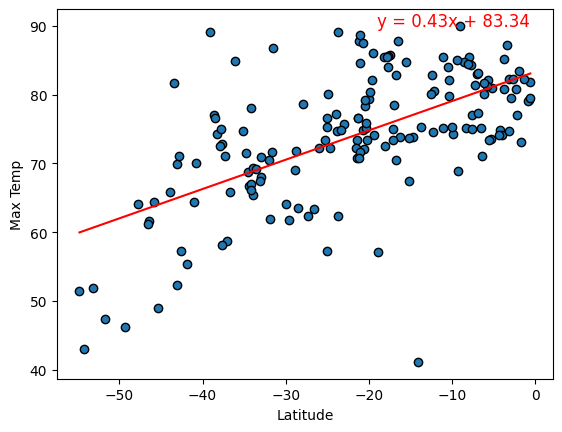

In [16]:
# Linear regression on Southern Hemisphere
southern_x_values = southern_hemi_df['Lat']
southern_y_values = southern_hemi_df['Max Temp']

lr(southern_x_values, southern_y_values, 'Max Temp')


**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong positive linear correlation between maximum temperature and latitude, indicating an increase in temperature with higher latitudes. In contrast, the Southern Hemisphere shows a weaker positive relationship, suggesting that latitude alone may not be a robust predictor of maximum temperature in this region.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.196400733362802


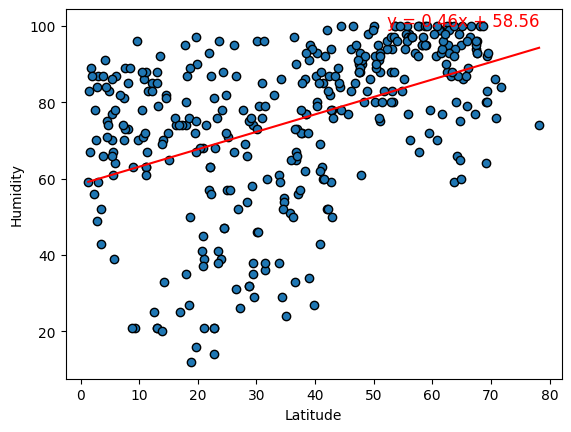

In [17]:
northern_x_values = northern_hemi_df['Lat']
northern_y_values = northern_hemi_df['Humidity']

lr(northern_x_values, northern_y_values, 'Humidity')


The r-value is: 0.045869025473445


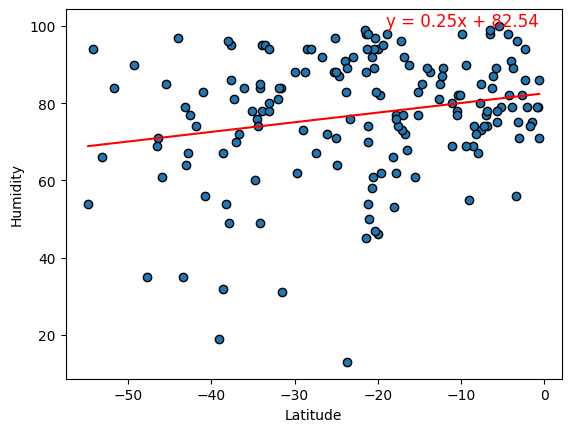

In [18]:
southern_x_values = southern_hemi_df['Lat']
southern_y_values = southern_hemi_df['Humidity']

lr(southern_x_values, southern_y_values, 'Humidity')


**Discussion about the linear relationship:** In both hemispheres, there is a weak positive correlation between latitude and humidity. As latitude increases , there is a slight tendency for humidity to rise.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.101679357659751


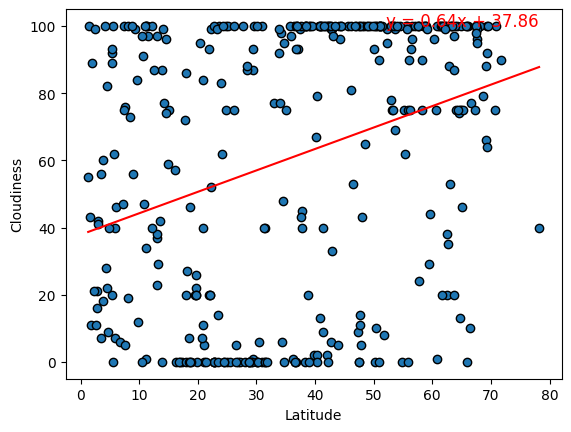

In [19]:
northern_x_values = northern_hemi_df['Lat']
northern_y_values = northern_hemi_df['Cloudiness']

lr(northern_x_values, northern_y_values, 'Cloudiness')


The r-value is: 0.003883370123027


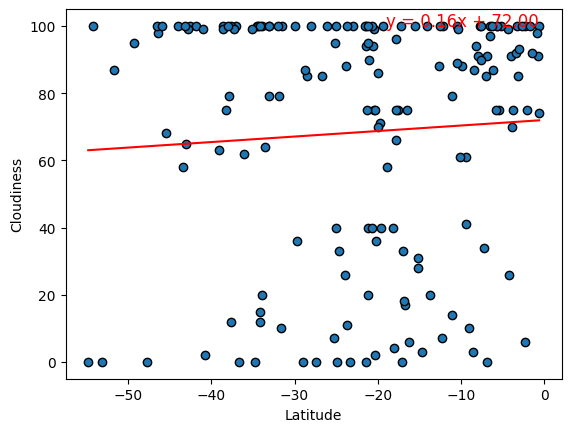

In [20]:
southern_x_values = southern_hemi_df['Lat']
southern_y_values = southern_hemi_df['Cloudiness']

lr(southern_x_values, southern_y_values, 'Cloudiness')


**Discussion about the linear relationship:** In both hemispheres, there is a weak positive correlation between cloudiness and latitude. The Southern Hemisphere exhibits a very weak correlation, while the Northern Hemisphere shows a slightly stronger but still weak tendency for cloudiness to increase with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.000446766082949


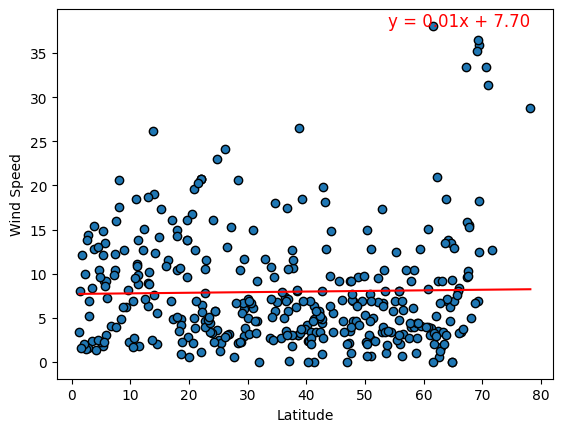

In [21]:
northern_x_values = northern_hemi_df['Lat']
northern_y_values = northern_hemi_df['Wind Speed']

lr(northern_x_values, northern_y_values, 'Wind Speed')


The r-value is: 0.102626740705176


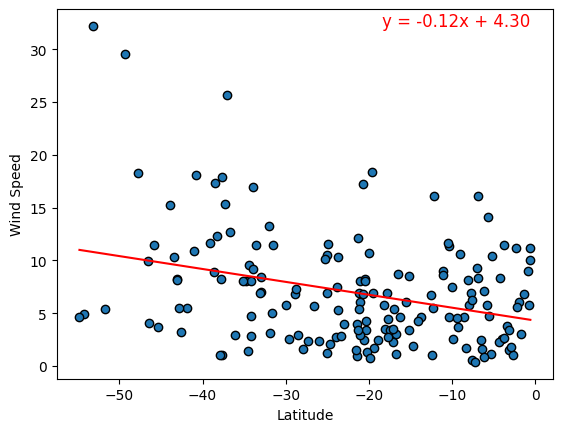

In [22]:
southern_x_values = southern_hemi_df['Lat']
southern_y_values = southern_hemi_df['Wind Speed']

lr(southern_x_values, southern_y_values, 'Wind Speed')


**Discussion about the linear relationship:** In the Northern Hemisphere, the correlation between wind speed and latitude is minimal. Conversely, in the Southern Hemisphere, there is a weak positive linear relationship, suggesting a slight elevation in wind speed as latitude increases.